# Digital Futures Capstone Project ; Predicting the key factors that determine the intensity of Lung Cancer

-- The dataset that was used in this project is from a research that was conducted in China
-- The ranks 1-9 represent the intensity of the categorical data
-- The target for the model is the intensity of lung cancer which is represented as Low, Medium & High

In [4]:
#import the big 4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
#import sklearn such as standard scalar and train test split for the model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#an import of couple models could be adding more later depending on the models i will be picking.
from sklearn.preprocessing import MinMaxScaler, StandardScaler # import two scalers ##robust scalar
from sklearn import metrics #measure performance
from sklearn.metrics import silhouette_score #unsupervised model
from sklearn.metrics import silhouette_samples
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier #import for decision tree
from sklearn.ensemble import RandomForestClassifier # import random forest
from sklearn import tree # import tree
from sklearn.cluster import KMeans #k-means
from sklearn.linear_model import LogisticRegression # Importing Logistic Regression
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, roc_curve, roc_auc_score

In [5]:
lung_cancer = pd.read_csv('lung_cancer_dataset.csv') #import the CSV file onto jupyter notebook

In [6]:
lung_cancer.head() #Check the first few rows and the columns of the dataset.

Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0         P1   33       1              2            4             5   
1        P10   17       1              3            1             5   
2       P100   35       1              4            5             6   
3      P1000   37       1              7            7             7   
4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0  ...        3            4                    2         2   
1  ...        1            3                    7         8   
2  ...        8            7                    9         2   
3  ...        4            2                    3         1   
4  ...        3            2                    4         1   

   Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  Dry Cough  \
0                      3                         1              2          3   
1                      6                         2              1          7   
2                      1                         4              6          7   
3                      4                         5              6          7   
4                      4                         2              4          2   

   Snoring   Level  
0        4     Low  
1        2  Medium  
2        2    High  
3        5    High  
4        3    High  

[5 rows x 25 columns]

## EDA

In [7]:
#Replace the spaces in the headers with an underscore
# Use the replace function
lung_cancer = lung_cancer.rename(columns=lambda x: x.replace(' ', '_'))

In [8]:
lung_cancer = lung_cancer.rename(columns={'Level': 'Intensity_Of_Cancer'}) # rename the level column so that the target column is clear

In [9]:
lung_cancer.isnull().sum() #Check for any nulls in the data

Patient_Id                  0
Age                         0
Gender                      0
Air_Pollution               0
Alcohol_use                 0
Dust_Allergy                0
OccuPational_Hazards        0
Genetic_Risk                0
chronic_Lung_Disease        0
Balanced_Diet               0
Obesity                     0
Smoking                     0
Passive_Smoker              0
Chest_Pain                  0
Coughing_of_Blood           0
Fatigue                     0
Weight_Loss                 0
Shortness_of_Breath         0
Wheezing                    0
Swallowing_Difficulty       0
Clubbing_of_Finger_Nails    0
Frequent_Cold               0
Dry_Cough                   0
Snoring                     0
Intensity_Of_Cancer         0
dtype: int64

In [10]:
lung_cancer.info() # info on the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient_Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air_Pollution             1000 non-null   int64 
 4   Alcohol_use               1000 non-null   int64 
 5   Dust_Allergy              1000 non-null   int64 
 6   OccuPational_Hazards      1000 non-null   int64 
 7   Genetic_Risk              1000 non-null   int64 
 8   chronic_Lung_Disease      1000 non-null   int64 
 9   Balanced_Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive_Smoker            1000 non-null   int64 
 13  Chest_Pain                1000 non-null   int64 
 14  Coughing_of_Blood        

In [11]:
lung_cancer

Patient_Id  Age  Gender  Air_Pollution  Alcohol_use  Dust_Allergy  \
0           P1   33       1              2            4             5   
1          P10   17       1              3            1             5   
2         P100   35       1              4            5             6   
3        P1000   37       1              7            7             7   
4         P101   46       1              6            8             7   
..         ...  ...     ...            ...          ...           ...   
995       P995   44       1              6            7             7   
996       P996   37       2              6            8             7   
997       P997   25       2              4            5             6   
998       P998   18       2              6            8             7   
999       P999   47       1              6            5             6   

     OccuPational_Hazards  Genetic_Risk  chronic_Lung_Disease  Balanced_Diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2                       5             5                     4              6   
3                       7             6                     7              7   
4                       7             7                     6              7   
..                    ...           ...                   ...            ...   
995                     7             7                     6              7   
996                     7             7                     6              7   
997                     5             5                     4              6   
998                     7             7                     6              7   
999                     5             5                     4              6   

     ...  Fatigue  Weight_Loss  Shortness_of_Breath  Wheezing  \
0    ...        3            4                    2         2   
1    ...        1            3                    7         8   
2    ...        8            7                    9         2   
3    ...        4            2                    3         1   
4    ...        3            2                    4         1   
..   ...      ...          ...                  ...       ...   
995  ...        5            3                    2         7   
996  ...        9            6                    5         7   
997  ...        8            7                    9         2   
998  ...        3            2                    4         1   
999  ...        8            7                    9         2   

     Swallowing_Difficulty  Clubbing_of_Finger_Nails  Frequent_Cold  \
0                        3                         1              2   
1                        6                         2              1   
2                        1                         4              6   
3                        4                         5              6   
4                        4                         2              4   
..                     ...                       ...            ...   
995                      8                         2              4   
996                      2                         4              3   
997                      1                         4              6   
998                      4                         2              4   
999                      1                         4              6   

     Dry_Cough  Snoring  Intensity_Of_Cancer  
0            3        4                  Low  
1            7        2               Medium  
2            7        2                 High  
3            7        5                 High  
4            2        3                 High  
..         ...      ...                  ...  
995          5        3                 High  
996          1        4                 High  
997          7        2                 High  
998          2        3                 High  
999          7 

In [12]:
#Making sure that all the words and headers are lowercased
lung_cancer = lung_cancer.applymap(lambda s: s.lower() if type(s) == str else s)
lung_cancer.columns = map(str.lower, lung_cancer.columns)

In [13]:
#Dropping the PatientID
lung_cancer.drop(["patient_id"], axis=1, inplace = True)

In [14]:
#Checking to see if this has worked
lung_cancer

age  gender  air_pollution  alcohol_use  dust_allergy  \
0     33       1              2            4             5   
1     17       1              3            1             5   
2     35       1              4            5             6   
3     37       1              7            7             7   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
995   44       1              6            7             7   
996   37       2              6            8             7   
997   25       2              4            5             6   
998   18       2              6            8             7   
999   47       1              6            5             6   

     occupational_hazards  genetic_risk  chronic_lung_disease  balanced_diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2                       5             5                     4              6   
3                       7             6                     7              7   
4                       7             7                     6              7   
..                    ...           ...                   ...            ...   
995                     7             7                     6              7   
996                     7             7                     6              7   
997                     5             5                     4              6   
998                     7             7                     6              7   
999                     5             5                     4              6   

     obesity  ...  fatigue  weight_loss  shortness_of_breath  wheezing  \
0          4  ...        3            4                    2         2   
1          2  ...        1            3                    7         8   
2          7  ...        8            7                    9         2   
3          7  ...        4            2                    3         1   
4          7  ...        3            2                    4         1   
..       ...  ...      ...          ...                  ...       ...   
995        7  ...        5            3                    2         7   
996        7  ...        9            6                    5         7   
997        7  ...        8            7                    9         2   
998        7  ...        3            2                    4         1   
999        7  ...        8            7                    9         2   

     swallowing_difficulty  clubbing_of_finger_nails  frequent_cold  \
0                        3                         1              2   
1                        6                         2              1   
2                        1                         4              6   
3                        4                         5              6   
4                        4                         2              4   
..                     ...                       ...            ...   
995                      8                         2              4   
996                      2                         4              3   
997                      1                         4              6   
998                      4                         2              4   
999                      1                         4              6   

     dry_cough  snoring  intensity_of_cancer  
0            3        4                  low  
1            7        2               medium  
2            7        2                 high  
3            7        5                 high  
4            2        3                 high  
..         ...      ...                  ...  
995          5        3                 high  
996          1        4                 high  
997          7        2                 high  
998          2        3                 high  
999          7        2                 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'air_pollution'}>,
        <AxesSubplot:title={'center':'alcohol_use'}>,
        <AxesSubplot:title={'center':'dust_allergy'}>],
       [<AxesSubplot:title={'center':'occupational_hazards'}>,
        <AxesSubplot:title={'center':'genetic_risk'}>,
        <AxesSubplot:title={'center':'chronic_lung_disease'}>,
        <AxesSubplot:title={'center':'balanced_diet'}>,
        <AxesSubplot:title={'center':'obesity'}>],
       [<AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'passive_smoker'}>,
        <AxesSubplot:title={'center':'chest_pain'}>,
        <AxesSubplot:title={'center':'coughing_of_blood'}>,
        <AxesSubplot:title={'center':'fatigue'}>],
       [<AxesSubplot:title={'center':'weight_loss'}>,
        <AxesSubplot:title={'center':'shortness_of_breath'}>,
        <AxesSubplot:title={'center':'wheezing'}>,
        <Axes

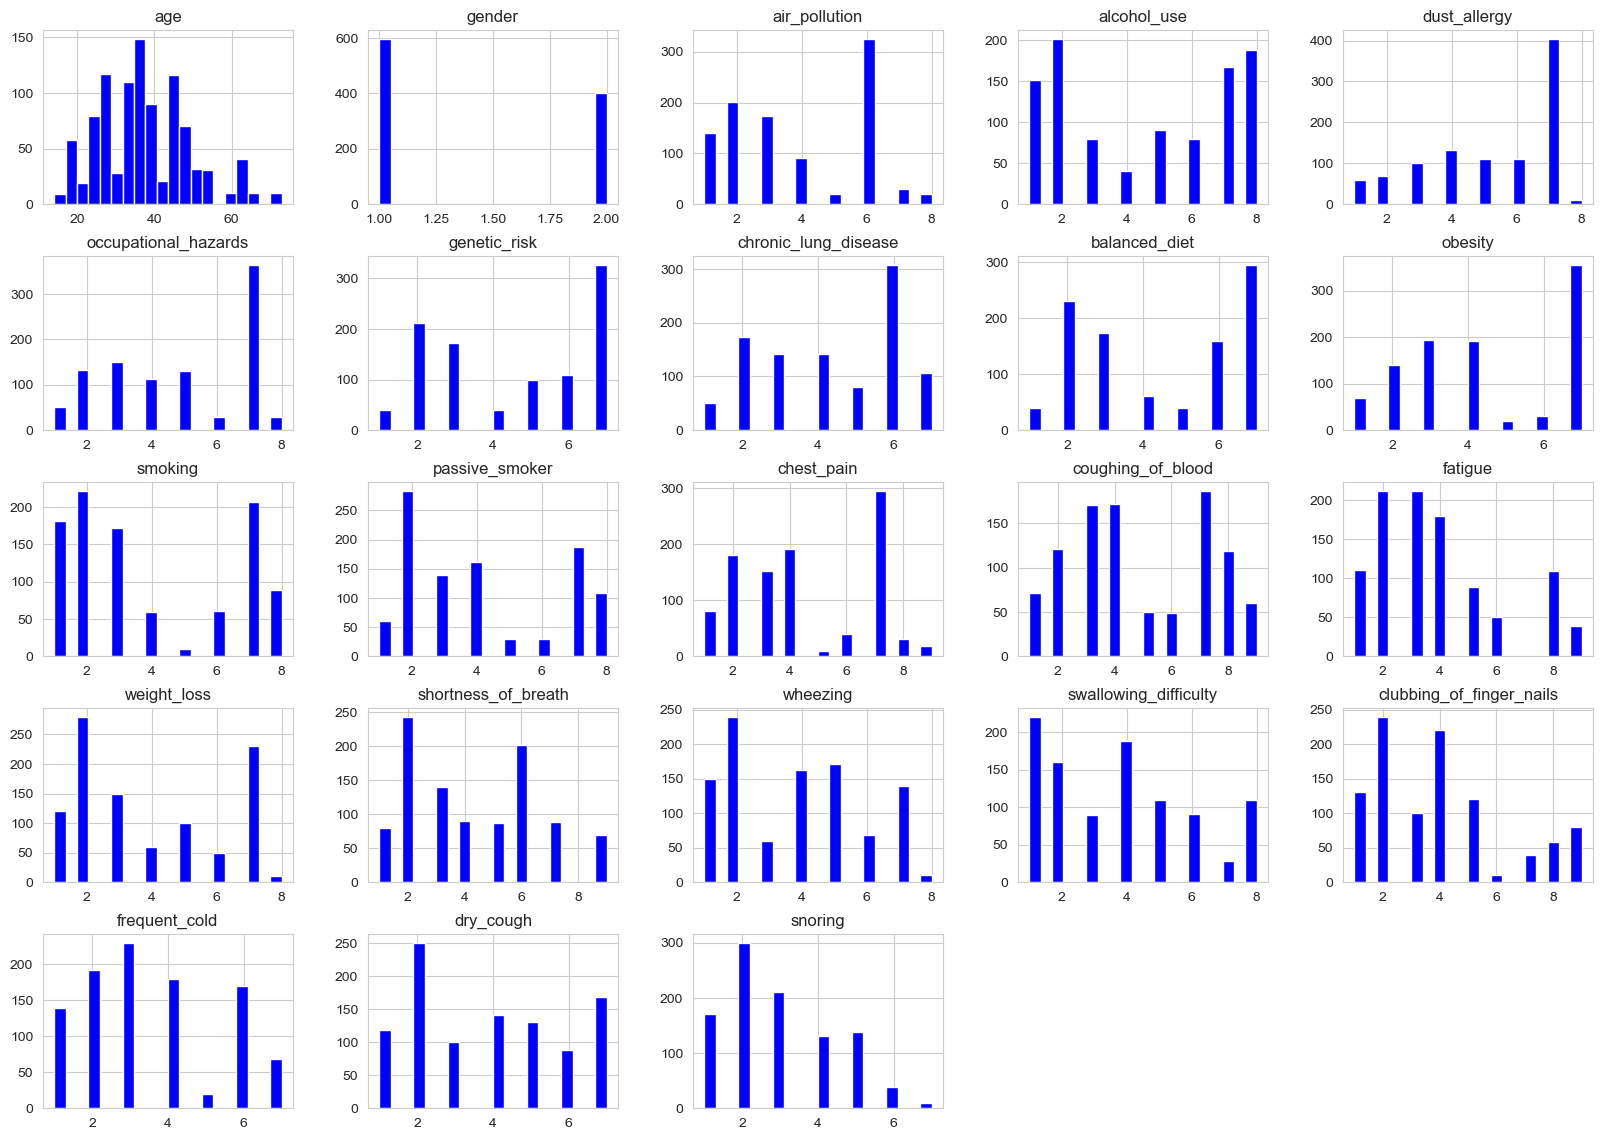

In [15]:
lung_cancer.hist(bins=20, color='blue', figsize=(20, 14)) # each data type on a histogram

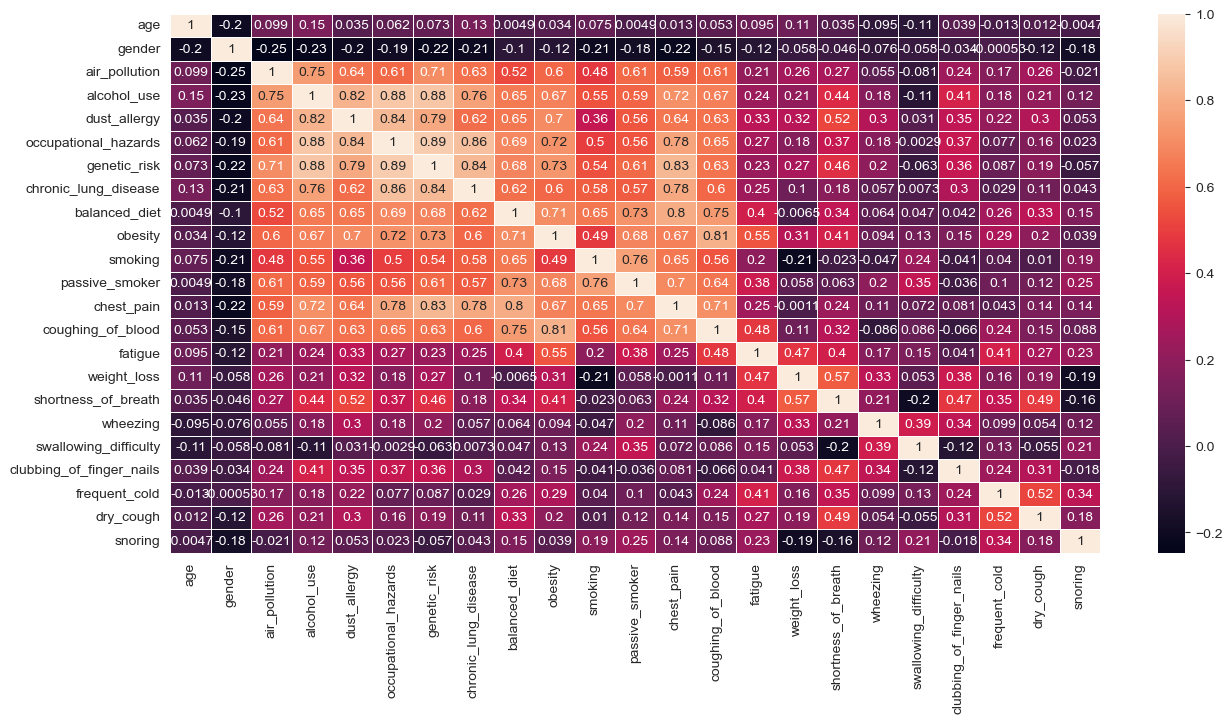

In [16]:
#Correlation matrix checking to see the correlation between the numerical data
plt.figure(figsize = (15,7))

corrMatrix = lung_cancer.corr()
sns.heatmap(corrMatrix, annot=True, linewidths=.5);

In [17]:
# To check the count of cancer intensity to see if there is a balance in the dataset
lung_cancer['intensity_of_cancer'].value_counts()

high      365
medium    332
low       303
Name: intensity_of_cancer, dtype: int64

In [18]:
lung_cancer.describe()

age       gender  air_pollution  alcohol_use  dust_allergy  \
count  1000.000000  1000.000000      1000.0000  1000.000000   1000.000000   
mean     37.174000     1.402000         3.8400     4.563000      5.165000   
std      12.005493     0.490547         2.0304     2.620477      1.980833   
min      14.000000     1.000000         1.0000     1.000000      1.000000   
25%      27.750000     1.000000         2.0000     2.000000      4.000000   
50%      36.000000     1.000000         3.0000     5.000000      6.000000   
75%      45.000000     2.000000         6.0000     7.000000      7.000000   
max      73.000000     2.000000         8.0000     8.000000      8.000000   

       occupational_hazards  genetic_risk  chronic_lung_disease  \
count           1000.000000   1000.000000           1000.000000   
mean               4.840000      4.580000              4.380000   
std                2.107805      2.126999              1.848518   
min                1.000000      1.000000              1.000000   
25%                3.000000      2.000000              3.000000   
50%                5.000000      5.000000              4.000000   
75%                7.000000      7.000000              6.000000   
max                8.000000      7.000000              7.000000   

       balanced_diet      obesity  ...  coughing_of_blood      fatigue  \
count    1000.000000  1000.000000  ...        1000.000000  1000.000000   
mean        4.491000     4.465000  ...           4.859000     3.856000   
std         2.135528     2.124921  ...           2.427965     2.244616   
min         1.000000     1.000000  ...           1.000000     1.000000   
25%         2.000000     3.000000  ...           3.000000     2.000000   
50%         4.000000     4.000000  ...           4.000000     3.000000   
75%         7.000000     7.000000  ...           7.000000     5.000000   
max         7.000000     7.000000  ...           9.000000     9.000000   

       weight_loss  shortness_of_breath     wheezing  swallowing_difficulty  \
count  1000.000000          1000.000000  1000.000000            1000.000000   
mean      3.855000             4.240000     3.777000               3.746000   
std       2.206546             2.285087     2.041921               2.270383   
min       1.000000             1.000000     1.000000               1.000000   
25%       2.000000             2.000000     2.000000               2.000000   
50%       3.000000             4.000000     4.000000               4.000000   
75%       6.000000             6.000000     5.000000               5.000000   
max       8.000000             9.000000     8.000000               8.000000   

       clubbing_of_finger_nails  frequent_cold    dry_cough      snoring  
count               1000.000000    1000.000000  1000.000000  1000.000000  
mean                   3.923000       3.536000     3.853000     2.926000  
std                    2.388048       1.832502     2.039007     1.474686  
min                    1.000000       1.000000     1.000000     1.000000  
25%                    2.000000       2.000000     2.000000     2.000000  
50%                    4.000000       3.000000     4.000000     3.000000  
75%                    5.000000       5.000000     6.000000     4.000000  
max                    9.000000       7.000000     7.000000     7.000000  

[8 rows x 23 columns]

## Data Analysis/Storytelling

In [19]:
#First i wanted to see how the ages were distributed against the intensity of lung cancer

fig = px.histogram(lung_cancer, x = 'age', color = 'intensity_of_cancer', nbins = 10, title = 'Distribution of Data', text_auto = True, color_discrete_sequence=['#619CFF', '#FF7F0E', '#D62728'])
fig.show()

In [20]:
#Showing distribution of Chronic Lung Disease
fig = px.histogram(lung_cancer, x = 'chronic_lung_disease', y = 'gender', color = 'intensity_of_cancer', barmode = 'group', nbins = 10, title = 'Distribution of Chronic Lung Disease', text_auto = True, color_discrete_sequence=['#619CFF', '#FF7F0E', '#D62728'])
fig.show()

In [21]:
#group the genders together for the distribution of Lung Disease
fig = px.histogram(lung_cancer, x = 'smoking', y = 'gender', color = 'intensity_of_cancer', barmode = 'group', nbins = 10, title = 'Distribution of Smoking', text_auto = True, color_discrete_sequence=['#619CFF', '#FF7F0E', '#D62728'])
fig.show()

In [22]:
#showing the distribution of coughing blood against the intensity of lung cancer
fig = px.histogram(lung_cancer, x = 'coughing_of_blood', y = 'gender', color = 'intensity_of_cancer', barmode = 'group', nbins = 10, title = 'Distribution of Coughing of Blood', text_auto = True,color_discrete_sequence=['#619CFF', '#FF7F0E', '#D62728'] )
fig.show()

In [23]:
#Distribution of Alcohol Use
fig = px.histogram(lung_cancer, x = 'alcohol_use', y = 'gender', color = 'intensity_of_cancer', barmode = 'group', nbins = 10, title = 'Distribution of Alcohol Use', text_auto = True, color_discrete_sequence=['#619CFF', '#FF7F0E', '#D62728'])
fig.show()

In [24]:
#Genetic Risk against the intensity of lung cancer
fig = px.histogram(lung_cancer, x = 'genetic_risk', y = 'gender', color = 'intensity_of_cancer', barmode = 'group', nbins = 10, title = 'Distribution of Genetic Risk', text_auto = True, color_discrete_sequence=['#619CFF', '#FF7F0E', '#D62728'])
fig.show()

In [25]:
#Swallowing difficulty against the intensity of lung cancer
fig = px.histogram(lung_cancer, x = 'swallowing_difficulty', y = 'gender', color = 'intensity_of_cancer', barmode = 'group', nbins = 10, title = 'Distribution of Swallowing Difficulty', text_auto = True, color_discrete_sequence=['#619CFF', '#FF7F0E', '#D62728'])
fig.show()

## Train Test Split!

In [26]:
#First change the intensity of cancer column to integer so map 0,1,2 as low, med, and high
lung_cancer['intensity_of_cancer'] = lung_cancer['intensity_of_cancer'].map({'low': 0, 'medium': 1, 'high': 2})

In [27]:
#Check to see if it has worked
lung_cancer

age  gender  air_pollution  alcohol_use  dust_allergy  \
0     33       1              2            4             5   
1     17       1              3            1             5   
2     35       1              4            5             6   
3     37       1              7            7             7   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
995   44       1              6            7             7   
996   37       2              6            8             7   
997   25       2              4            5             6   
998   18       2              6            8             7   
999   47       1              6            5             6   

     occupational_hazards  genetic_risk  chronic_lung_disease  balanced_diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2                       5             5                     4              6   
3                       7             6                     7              7   
4                       7             7                     6              7   
..                    ...           ...                   ...            ...   
995                     7             7                     6              7   
996                     7             7                     6              7   
997                     5             5                     4              6   
998                     7             7                     6              7   
999                     5             5                     4              6   

     obesity  ...  fatigue  weight_loss  shortness_of_breath  wheezing  \
0          4  ...        3            4                    2         2   
1          2  ...        1            3                    7         8   
2          7  ...        8            7                    9         2   
3          7  ...        4            2                    3         1   
4          7  ...        3            2                    4         1   
..       ...  ...      ...          ...                  ...       ...   
995        7  ...        5            3                    2         7   
996        7  ...        9            6                    5         7   
997        7  ...        8            7                    9         2   
998        7  ...        3            2                    4         1   
999        7  ...        8            7                    9         2   

     swallowing_difficulty  clubbing_of_finger_nails  frequent_cold  \
0                        3                         1              2   
1                        6                         2              1   
2                        1                         4              6   
3                        4                         5              6   
4                        4                         2              4   
..                     ...                       ...            ...   
995                      8                         2              4   
996                      2                         4              3   
997                      1                         4              6   
998                      4                         2              4   
999                      1                         4              6   

     dry_cough  snoring  intensity_of_cancer  
0            3        4                    0  
1            7        2                    1  
2            7        2                    2  
3            7        5                    2  
4            2        3                    2  
..         ...      ...                  ...  
995          5        3                    2  
996          1        4                    2  
997          7        2                    2  
998          2        3                    2  
999          7        2                 

In [28]:
# Train Test Split!

X = lung_cancer.drop('intensity_of_cancer', axis=1)
y = lung_cancer['intensity_of_cancer']

In [29]:
X.shape, y.shape # Check Shape

((1000, 23), (1000,))

In [30]:
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.9, random_state=42)

## Modelling (Logistic Regression)

In [31]:
#Creating the object for the model
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

In [32]:
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
scores = cross_val_score(model_lg, X_train, y_train, cv=kfold)

print(f'Accuracy (mean): {scores.mean()}')
print(f'Accuracy (std): {scores.std()}')

Accuracy (mean): 0.9007724301841948
Accuracy (std): 0.05461906212373812


In [33]:
# Now we have to model the training data

model_lg.fit(X_train, y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [34]:
# Making Predictions
pred_lg = model_lg.predict(X_test)

In [35]:
# Calculating Accuracy of the model

lg = (accuracy_score(y_test, pred_lg))
print(lg)

0.9555555555555556


In [36]:
# Classification Report

print(classification_report(y_test, pred_lg))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       270
           1       0.97      0.94      0.95       309
           2       0.92      1.00      0.96       321

    accuracy                           0.96       900
   macro avg       0.96      0.95      0.96       900
weighted avg       0.96      0.96      0.96       900



              precision    recall  f1-score   support

           0       0.99      0.92      0.95       270
           1       0.97      0.94      0.95       309
           2       0.92      1.00      0.96       321

    accuracy                           0.96       900
   macro avg       0.96      0.95      0.96       900
weighted avg       0.96      0.96      0.96       900



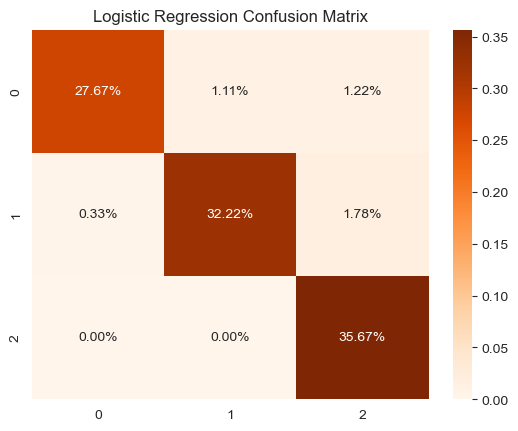

In [37]:
print(classification_report(y_test, pred_lg))
# Confusion Matrix

cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1 / np.sum(cm1), annot=True, fmt='0.2%', cmap="Oranges")
plt.title("Logistic Regression Confusion Matrix", fontsize=12)
plt.show()

## Decision Tree

In [81]:
# Creating object of the model
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [82]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dt_model, X_train, y_train, cv=kfold)

print(f'Accuracy (mean): {scores.mean()}')
print(f'Accuracy (std): {scores.std()}')

Accuracy (mean): 0.9400000000000001
Accuracy (std): 0.048989794855663564


In [83]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [84]:
pred_dt = dt_model.predict(X_test)

In [85]:
dt  = round(accuracy_score(y_test, pred_dt)*100, 2)
print(dt)

89.33


In [86]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       270
           1       0.93      0.78      0.85       309
           2       0.94      0.97      0.96       321

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.90      0.89      0.89       900



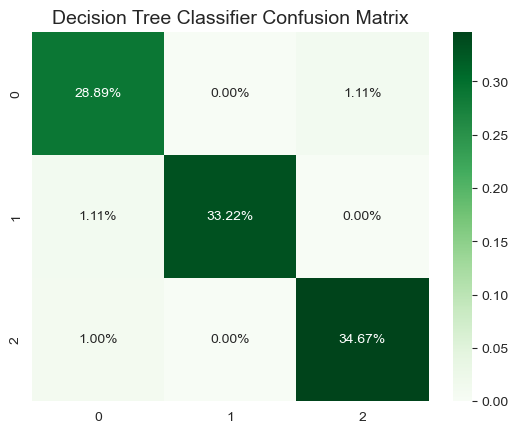

In [44]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Greens')
plt.title("Decision Tree Classifier Confusion Matrix",fontsize=14)
plt.show()

[Text(0.5384615384615384, 0.9, 'X[13] <= 5.5\ngini = 0.645\nsamples = 100\nvalue = [33, 23, 44]'),
 Text(0.38461538461538464, 0.7, 'X[22] <= 4.5\ngini = 0.493\nsamples = 53\nvalue = [32, 20, 1]'),
 Text(0.3076923076923077, 0.5, 'X[16] <= 5.0\ngini = 0.373\nsamples = 42\nvalue = [32, 9, 1]'),
 Text(0.15384615384615385, 0.3, 'X[17] <= 4.5\ngini = 0.061\nsamples = 32\nvalue = [31, 1, 0]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.46153846153846156, 0.3, 'X[18] <= 7.0\ngini = 0.34\nsamples = 10\nvalue = [1, 8, 1]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.46153846153846156, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0]'),
 Text(0.6923076923076923, 0.7, 'X[2] <= 1.5\ngini = 0.158\nsamples = 47\nvalue = [1, 3, 43]'),
 Text(0.61538461538461

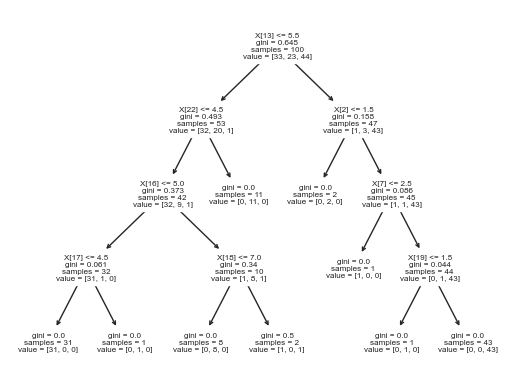

In [45]:
tree.plot_tree(dt_model) #Plot Decision Tree

## Random Forest

In [46]:
# Creating model object
rf_model = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.04, random_state=42)

In [47]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X_train, y_train, cv=kfold)

print(f'Accuracy (mean): {scores.mean()}')
print(f'Accuracy (std): {scores.std()}')

Accuracy (mean): 0.9
Accuracy (std): 0.08366600265340755


In [48]:
# Training Model
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.04, n_estimators=300, random_state=42)

In [49]:
# Making Prediction
pred_rf = rf_model.predict(X_test)

In [50]:
# Calculating Accuracy Score
randomforest = round(accuracy_score(y_test, pred_rf)*100, 2)
print(randomforest)

92.67


In [51]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       270
           1       0.97      0.85      0.90       309
           2       0.87      0.97      0.92       321

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



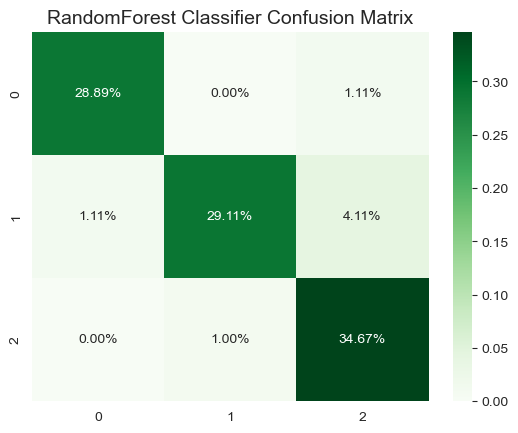

In [52]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Greens')
plt.title("RandomForest Classifier Confusion Matrix",fontsize=14)
plt.show()

# Unsupervised Approach (K-Means)

In [53]:
#Again lets look at our dataset
lung_cancer.head()

age  gender  air_pollution  alcohol_use  dust_allergy  \
0   33       1              2            4             5   
1   17       1              3            1             5   
2   35       1              4            5             6   
3   37       1              7            7             7   
4   46       1              6            8             7   

   occupational_hazards  genetic_risk  chronic_lung_disease  balanced_diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   obesity  ...  fatigue  weight_loss  shortness_of_breath  wheezing  \
0        4  ...        3            4                    2         2   
1        2  ...        1            3                    7         8   
2        7  ...        8            7                    9         2   
3        7  ...        4            2                    3         1   
4        7  ...        3            2                    4         1   

   swallowing_difficulty  clubbing_of_finger_nails  frequent_cold  dry_cough  \
0                      3                         1              2          3   
1                      6                         2              1          7   
2                      1                         4              6          7   
3                      4                         5              6          7   
4                      4                         2              4          2   

   snoring  intensity_of_cancer  
0        4                    0  
1        2                    1  
2        2                    2  
3        5                    2  
4        3                    2  

[5 rows x 24 columns]

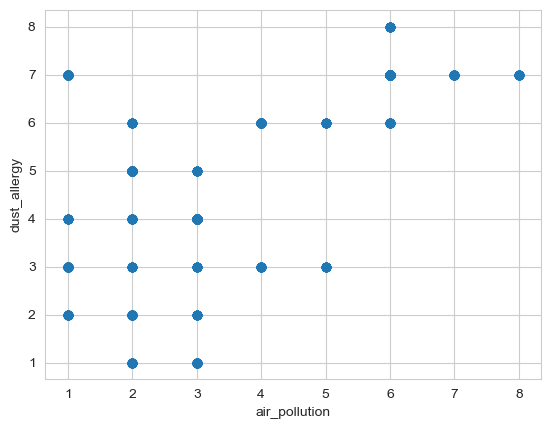

In [54]:
#Pick 2 random columns to visualise

x_name = 'air_pollution' #air pollution as x
y_name = 'dust_allergy' # dust allergy as y

plt.scatter(lung_cancer[x_name], lung_cancer[y_name]) # Scatterplot

plt.xlabel(x_name)
plt.ylabel(y_name)
plt.show()

In [55]:
km = KMeans(n_clusters=3, random_state=124)  # set the number of clusters to 3 and the random state to 124
km.fit(X)  # fit the data to the k means model

KMeans(n_clusters=3, random_state=124)

In [56]:
#the labels. The predicted cluster for each datapoint!
km.labels_

array([0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1,
       1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0,
       0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2,
       1, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2,
       1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 2,
       1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 2, 2, 0,
       2, 1, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,

In [57]:
# unique cluster labels
np.unique(km.labels_)

array([0, 1, 2])

In [58]:
#Add cluster labels to the data frame
lung_cancer['cluster'] = km.labels_

In [59]:
lung_cancer.sort_values('cluster')

age  gender  air_pollution  alcohol_use  dust_allergy  \
0     33       1              2            4             5   
306   31       2              3            2             4   
305   36       2              2            1             5   
702   27       2              3            1             4   
706   27       1              3            1             4   
..   ...     ...            ...          ...           ...   
765   29       2              4            5             6   
764   19       1              6            8             7   
763   28       1              6            7             7   
771   37       2              7            7             7   
226   37       1              7            7             7   

     occupational_hazards  genetic_risk  chronic_lung_disease  balanced_diet  \
0                       4             3                     2              2   
306                     2             3                     2              3   
305                     3             2                     3              2   
702                     2             3                     2              3   
706                     3             2                     3              4   
..                    ...           ...                   ...            ...   
765                     5             5                     4              6   
764                     7             7                     6              7   
763                     7             7                     6              7   
771                     7             6                     7              7   
226                     7             6                     7              7   

     obesity  ...  weight_loss  shortness_of_breath  wheezing  \
0          4  ...            4                    2         2   
306        3  ...            5                    6         5   
305        4  ...            7                    2         5   
702        3  ...            2                    3         4   
706        3  ...            2                    2         4   
..       ...  ...          ...                  ...       ...   
765        7  ...            7                    9         2   
764        7  ...            6                    5         7   
763        7  ...            3                    2         7   
771        7  ...            2                    3         1   
226        7  ...            2                    3         1   

     swallowing_difficulty  clubbing_of_finger_nails  frequent_cold  \
0                        3                         1              2   
306                      5                         4              6   
305                      8                         1              3   
702                      1                         5              2   
706                      2                         2              3   
..                     ...                       ...            ...   
765                      1                         4              6   
764                      2                         4              3   
763                      8                         2              4   
771                      4                         5              6   
226                      4                         5              6   

     dry_cough  snoring  intensity_of_cancer  cluster  
0            3        4                    0        0  
306          5        4                    1        0  
305          2        3                    1        0  
702          6        2                    0        0  
706          4        3                    0        0  
..         ...      ...                  ...      ...  
765          7        2                    2        2  
764          1        4                    2        2  
763          5        3                    2        2  
771          7        5                    2        2  
226          7        5                    2     

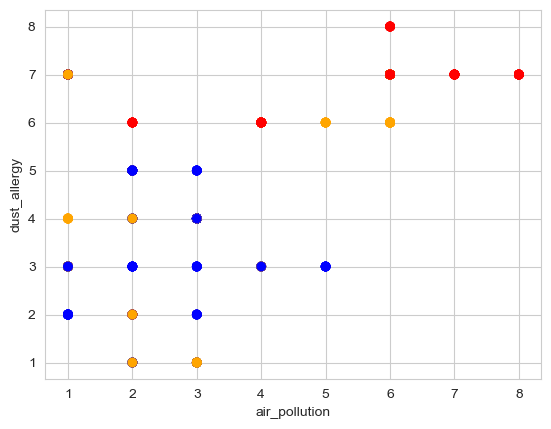

In [60]:
#Pick 3 colours
colors = np.array(['blue', 'orange', 'red'])
#scatterokit of 2 features, with hue based on their corresponding clusters
plt.scatter(x = lung_cancer['air_pollution'], y = lung_cancer['dust_allergy'], c=colors[list(lung_cancer.cluster)])
plt.xlabel('air_pollution')
plt.ylabel('dust_allergy')

plt.show()

In [61]:
#check out the coordinates for the centres of the clusters
km.cluster_centers_

array([[28.46407186,  1.55389222,  2.45508982,  2.34730539,  3.93712575,
         3.12275449,  2.73053892,  2.73652695,  2.87125749,  2.93413174,
         2.30538922,  2.72155689,  2.55688623,  2.89820359,  2.94311377,
         3.26347305,  3.28443114,  3.85329341,  4.02095808,  3.24550898,
         3.19461078,  3.34431138,  2.95808383],
       [50.75366569,  1.26979472,  3.81231672,  4.6744868 ,  4.93841642,
         4.83870968,  4.60410557,  4.47507331,  4.29618768,  4.31085044,
         4.01466276,  4.01173021,  4.29912023,  4.72140762,  3.94428152,
         4.03812317,  4.25513196,  3.62756598,  3.60997067,  4.02346041,
         3.35777126,  3.83870968,  2.8856305 ],
       [31.87692308,  1.38461538,  5.29230769,  6.72307692,  6.66461538,
         6.60615385,  6.45538462,  5.96923077,  6.36      ,  6.2       ,
         5.56615385,  5.90153846,  6.51692308,  7.01846154,  4.70153846,
         4.27076923,  5.20615385,  3.85538462,  3.60615385,  4.51384615,
         4.07384615,  4.3907

In [62]:
## Group the dataframe by cluster labels and calculate the mean of each column for each group
lung_cancer.groupby('cluster').mean()

age    gender  air_pollution  alcohol_use  dust_allergy  \
cluster                                                                  
0        28.464072  1.553892       2.455090     2.347305      3.937126   
1        50.753666  1.269795       3.812317     4.674487      4.938416   
2        31.876923  1.384615       5.292308     6.723077      6.664615   

         occupational_hazards  genetic_risk  chronic_lung_disease  \
cluster                                                             
0                    3.122754      2.730539              2.736527   
1                    4.838710      4.604106              4.475073   
2                    6.606154      6.455385              5.969231   

         balanced_diet   obesity  ...   fatigue  weight_loss  \
cluster                           ...                          
0             2.871257  2.934132  ...  2.943114     3.263473   
1             4.296188  4.310850  ...  3.944282     4.038123   
2             6.360000  6.200000  ...  4.701538     4.270769   

         shortness_of_breath  wheezing  swallowing_difficulty  \
cluster                                                         
0                   3.284431  3.853293               4.020958   
1                   4.255132  3.627566               3.609971   
2                   5.206154  3.855385               3.606154   

         clubbing_of_finger_nails  frequent_cold  dry_cough   snoring  \
cluster                                                                 
0                        3.245509       3.194611   3.344311  2.958084   
1                        4.023460       3.357771   3.838710  2.885630   
2                        4.513846       4.073846   4.390769  2.935385   

         intensity_of_cancer  
cluster                       
0                   0.440120  
1                   1.070381  
2                   1.692308  

[3 rows x 24 columns]

In [63]:
#deploy the min-max scaler to bind the data between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
#deploy a k means on the scaled version of our data instead
km2 = KMeans(n_clusters=3, random_state=124)
km2.fit(X_scaled)

KMeans(n_clusters=3, random_state=124)

In [65]:
km2.labels_ # Get the cluster labels assigned by the Kmeans algorithm

array([2, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 2, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1,
       0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 1,

In [66]:
#Make sure to integrate the new cluster into the dataset
lung_cancer['cluster_scaled'] = km2.labels_

In [67]:
#Do a value count to see the distribution of clusters
lung_cancer['cluster'].value_counts()

1    341
0    334
2    325
Name: cluster, dtype: int64

In [68]:
lung_cancer['cluster_scaled'].value_counts() # use value counts method to count the number of occurrences of each unique value in the cluster_scaled

2    445
0    375
1    180
Name: cluster_scaled, dtype: int64

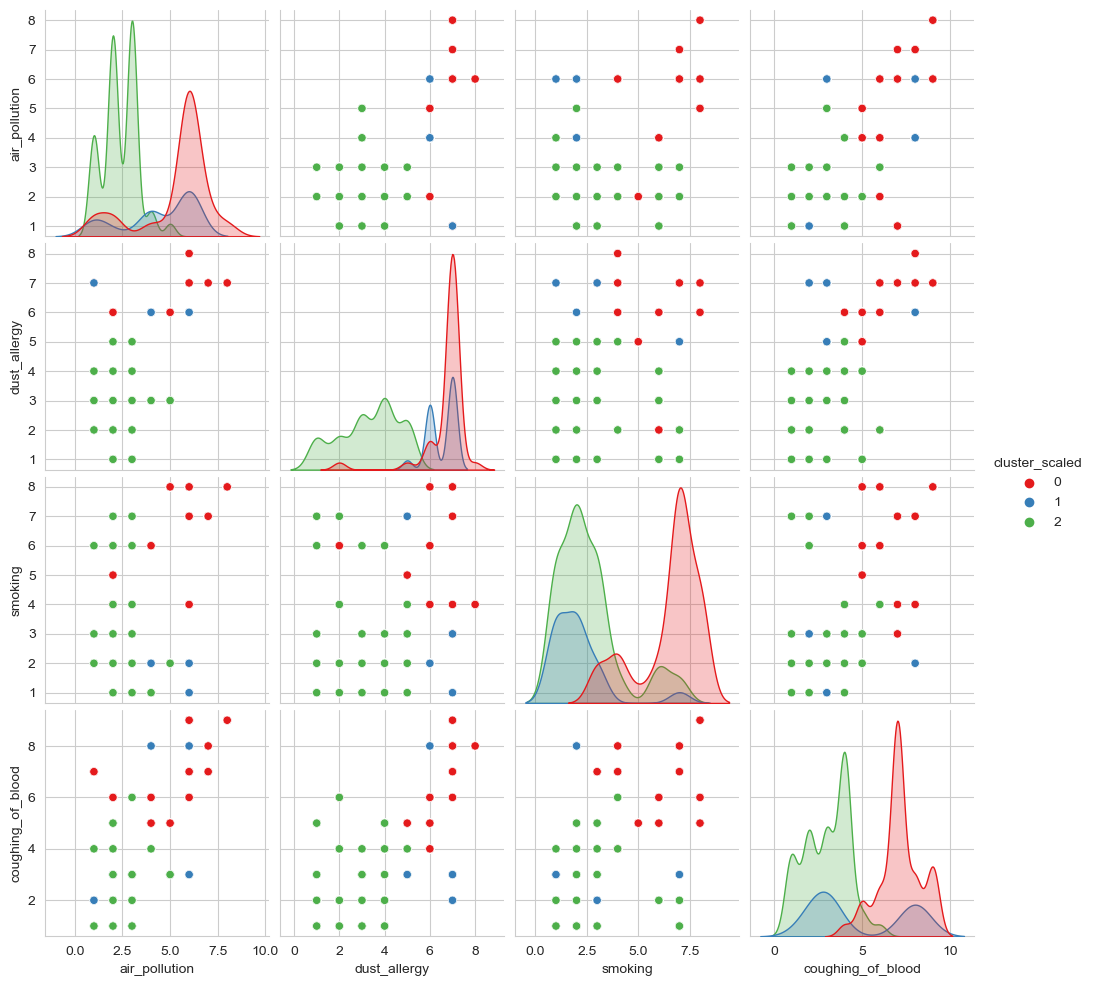

In [69]:
#lets have a look at few pairplots of the different columns in the dataset
sns.pairplot(lung_cancer[['air_pollution','dust_allergy','smoking','coughing_of_blood', 'cluster_scaled']], hue='cluster_scaled', palette='Set1')
plt.show()

In [70]:
# Sort the dataframe by the values in the 'cluster_scaled' column in ascending order,
# and drop the 'cluster' column since it is no longer needed.
lung_cancer.sort_values(by='cluster_scaled', ascending=True).drop(columns='cluster')


age  gender  air_pollution  alcohol_use  dust_allergy  \
344   64       1              6            8             7   
420   54       1              6            7             7   
797   24       1              6            8             7   
799   62       1              6            8             7   
800   29       2              6            7             7   
..   ...     ...            ...          ...           ...   
457   61       1              2            3             4   
458   27       2              3            1             4   
460   17       1              3            1             5   
434   38       1              2            3             5   
499   47       2              2            3             1   

     occupational_hazards  genetic_risk  chronic_lung_disease  balanced_diet  \
344                     7             7                     6              7   
420                     7             7                     6              7   
797                     7             6                     7              7   
799                     7             7                     6              7   
800                     7             7                     6              7   
..                    ...           ...                   ...            ...   
457                     2             1                     1              2   
458                     2             3                     2              3   
460                     3             4                     2              2   
434                     2             1                     1              1   
499                     3             2                     5              2   

     obesity  ...  weight_loss  shortness_of_breath  wheezing  \
344        7  ...            6                    5         7   
420        7  ...            3                    2         7   
797        3  ...            2                    5         2   
799        7  ...            2                    4         1   
800        7  ...            7                    6         7   
..       ...  ...          ...                  ...       ...   
457        4  ...            1                    3         2   
458        3  ...            2                    3         4   
460        2  ...            3                    7         8   
434        1  ...            1                    3         4   
499        1  ...            2                    1         2   

     swallowing_difficulty  clubbing_of_finger_nails  frequent_cold  \
344                      2                         4              3   
420                      8                         2              4   
797                      3                         2              1   
799                      4                         2              4   
800                      6                         7              2   
..                     ...                       ...            ...   
457                      1                         3              2   
458                      1                         5              2   
460                      6                         2              1   
434                      6                         1              3   
499                      3                         1              3   

     dry_cough  snoring  intensity_of_cancer  cluster_scaled  
344          1        4                    2               0  
420          5        3                    2               0  
797          7        6                    2               0  
799          2        3                    2               0  
800          3        1                    2               0  
..         ...      ...                  ...             ...  
457          1        2                    0               2  
458          6        2                    0               2  
460          7        2                    1               2  
434          2        2            

## Evaluating the Clusters - Silhouette Coefficient

In [71]:
## Calculate the Silhouette Score using the 'cluster' column as the cluster labels.
metrics.silhouette_score(lung_cancer, lung_cancer['cluster'])

0.2848252931631107

In [72]:
# Calculate the Silhouette Score for the scaled data in X_scaled, using the 'cluster_scaled'
metrics.silhouette_score(X_scaled, lung_cancer['cluster_scaled'])

0.3126120888930386

In [73]:
km2.labels_ #Access the cluster labels assigned by the Kmeans algorithm to each data point in the km2 object.

array([2, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 2, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1,
       0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 1,

In [74]:
km2.inertia_  #Access the sum of squared distances of data points to their closest cluster center for the clusters in km2 object.
#measures how well the kmeans algorithm has performed when clustering the data

1296.6002549292668

In [75]:
#plot a graph for the silhouette scores as well as for the inertia
k_range = range(2, 15)
scores = [] # Create empty lists to store the Silhouette Scores and sum of squared distances for each k value.
inertia = []
for k in k_range: # Loop through each value of k in the k_range and fit a KMeans model to the scaled data X_scaled.
    km3 = KMeans(n_clusters=k, random_state=124)
    km3.fit(X_scaled) #For each k value, calculate the Silhouette Score and inertia,
    scores.append(metrics.silhouette_score(X_scaled, km3.labels_))
    inertia.append(km3.inertia_)

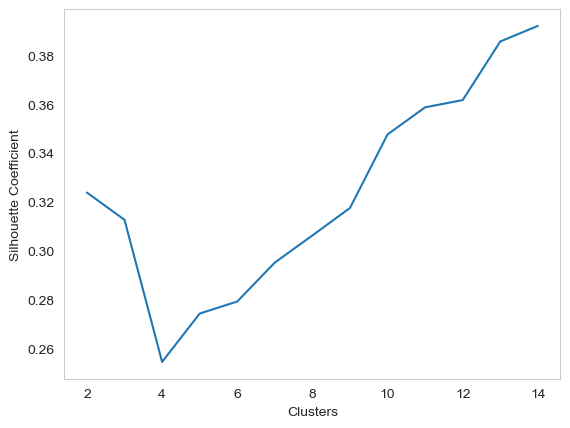

In [76]:
#check silhouette scores
plt.plot(k_range, scores)
plt.xlabel('Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(False)

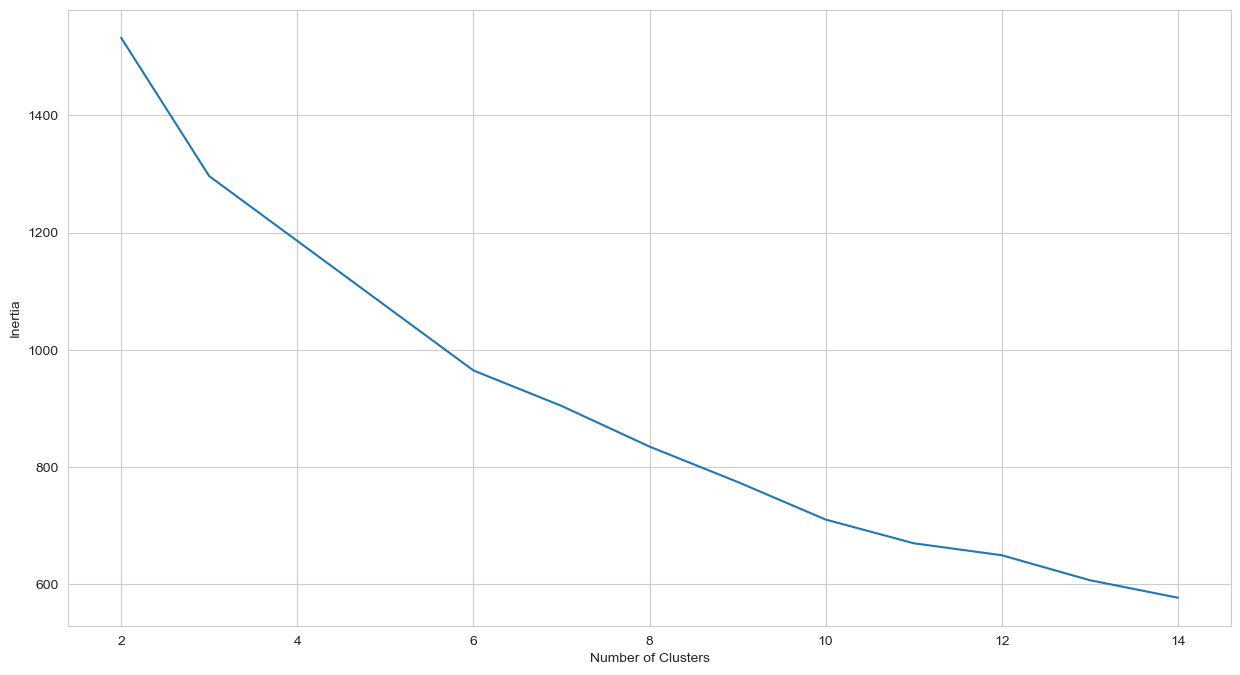

In [77]:
#check inertia scores
plt.figure(figsize=(15,8))
plt.plot(k_range, inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)

In [78]:
## Create a Kmeans object with 3 clusters
# Fit the KMeans object to the scaled data X_scaled.
# Assign the cluster labels to each data point
km = KMeans(n_clusters=3, random_state=124)
km.fit(X_scaled)
lung_cancer['cluster'] = km.labels_

In [79]:
#Drop the cluster scaled column
lung_cancer.drop(columns = ['cluster_scaled'], inplace=True)

In [80]:
## sort values according to the clusters. We want to see how the data has been grouped
lung_cancer.sort_values('cluster')

age  gender  air_pollution  alcohol_use  dust_allergy  \
344   64       1              6            8             7   
420   54       1              6            7             7   
797   24       1              6            8             7   
799   62       1              6            8             7   
800   29       2              6            7             7   
..   ...     ...            ...          ...           ...   
457   61       1              2            3             4   
458   27       2              3            1             4   
460   17       1              3            1             5   
434   38       1              2            3             5   
499   47       2              2            3             1   

     occupational_hazards  genetic_risk  chronic_lung_disease  balanced_diet  \
344                     7             7                     6              7   
420                     7             7                     6              7   
797                     7             6                     7              7   
799                     7             7                     6              7   
800                     7             7                     6              7   
..                    ...           ...                   ...            ...   
457                     2             1                     1              2   
458                     2             3                     2              3   
460                     3             4                     2              2   
434                     2             1                     1              1   
499                     3             2                     5              2   

     obesity  ...  weight_loss  shortness_of_breath  wheezing  \
344        7  ...            6                    5         7   
420        7  ...            3                    2         7   
797        3  ...            2                    5         2   
799        7  ...            2                    4         1   
800        7  ...            7                    6         7   
..       ...  ...          ...                  ...       ...   
457        4  ...            1                    3         2   
458        3  ...            2                    3         4   
460        2  ...            3                    7         8   
434        1  ...            1                    3         4   
499        1  ...            2                    1         2   

     swallowing_difficulty  clubbing_of_finger_nails  frequent_cold  \
344                      2                         4              3   
420                      8                         2              4   
797                      3                         2              1   
799                      4                         2              4   
800                      6                         7              2   
..                     ...                       ...            ...   
457                      1                         3              2   
458                      1                         5              2   
460                      6                         2              1   
434                      6                         1              3   
499                      3                         1              3   

     dry_cough  snoring  intensity_of_cancer  cluster  
344          1        4                    2        0  
420          5        3                    2        0  
797          7        6                    2        0  
799          2        3                    2        0  
800          3        1                    2        0  
..         ...      ...                  ...      ...  
457          1        2                    0        2  
458          6        2                    0        2  
460          7        2                    1        2  
434          2        2                    0        2  
499          4        2                    0     

# Conclusions

## So which was the best model?
-- As we can see from the supervised approach the best model was Logistic Regression
-- The main aim was to focus on recall as we wanted to reduce the amount of false positives
-- Unsupervised approach was also taken (K-means)
-- The results werent as great the silhouette score for x scaled was 0.31 shows that the catergorical data wasnt clustered properly into groups as this also showed when looking through the cluster groups